# Supervised Learning Capstone Project - Tree Methods Focus 



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [1]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../NOTEBOOKS_FINAL/DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

<Axes: xlabel='Churn', ylabel='count'>

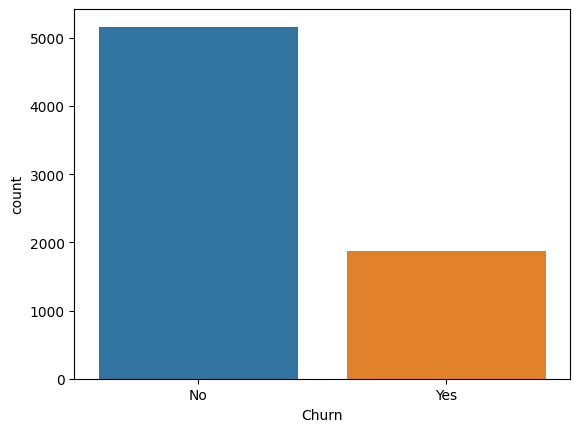

In [7]:
sns.countplot(data=df, x='Churn', hue='Churn')

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

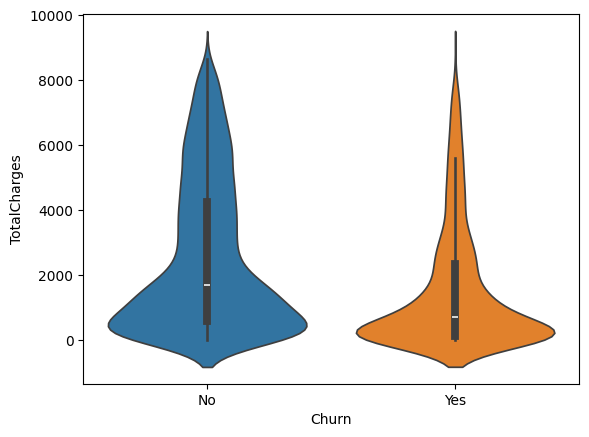

In [8]:
sns.violinplot(data=df, x='Churn', y='TotalCharges', hue='Churn')

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

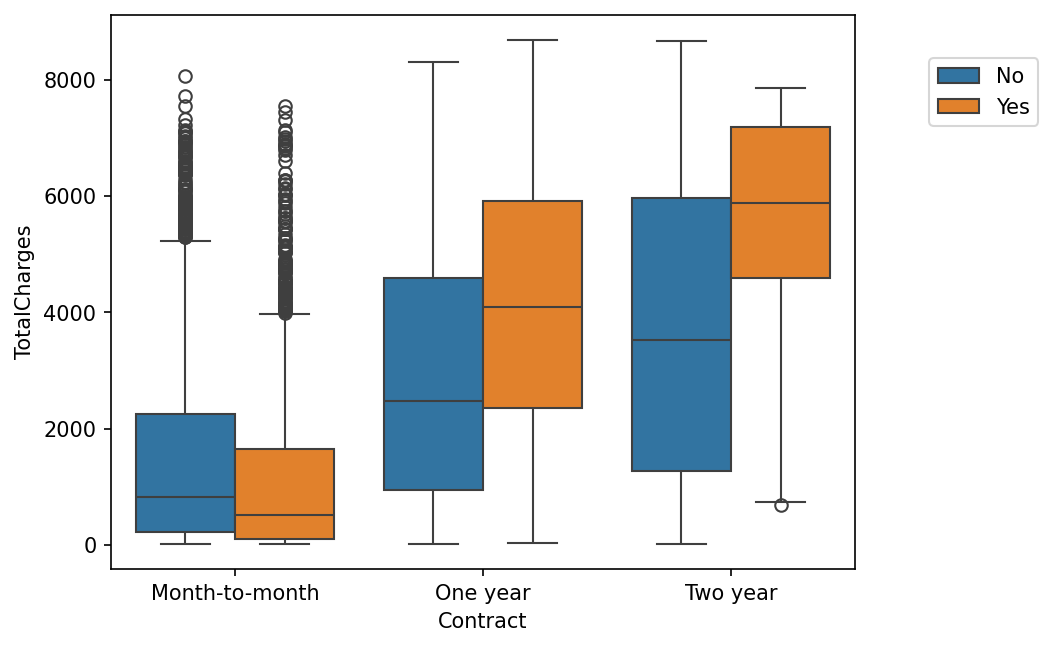

In [9]:
plt.figure(dpi=150)
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')
plt.legend(loc= (1.1, 0.8))

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [10]:
df_feat=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]
df_feat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,InternetService,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,No,Yes,No,No,DSL,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,Yes,No,Yes,No,DSL,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,Yes,Yes,No,No,DSL,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,Yes,No,Yes,Yes,DSL,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,No,No,No,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check,Yes


In [11]:
# OK to leave out drop_first arg as this is only for visualization, not for model, and we want to see which factors actually matter
df_dummy_feat= pd.get_dummies(df_feat)
df_dummy_feat.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,True,False,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False
1,0,False,True,True,False,True,False,False,True,True,...,True,False,True,False,False,False,False,True,True,False
2,0,False,True,True,False,True,False,False,True,True,...,False,False,False,True,False,False,False,True,False,True
3,0,False,True,True,False,True,False,True,False,False,...,True,False,True,False,True,False,False,False,True,False
4,0,True,False,True,False,True,False,False,True,True,...,False,False,False,True,False,False,True,False,False,True


In [12]:
# df_corr= pd.concat([df_dummy_feat, df['Churn']], axis=1)
# df_corr['Churn']= df_corr['Churn'].map({'Yes': 1, 'No': 0})
# df_corr.head()
df_corr= df_dummy_feat.corr()
df_corr.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982


In [13]:
df_corr['Churn_Yes'].sort_values()[1:-1]

Contract_Two year                         -0.301552
OnlineSecurity_No internet service        -0.227578
TechSupport_No internet service           -0.227578
InternetService_No                        -0.227578
OnlineBackup_No internet service          -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

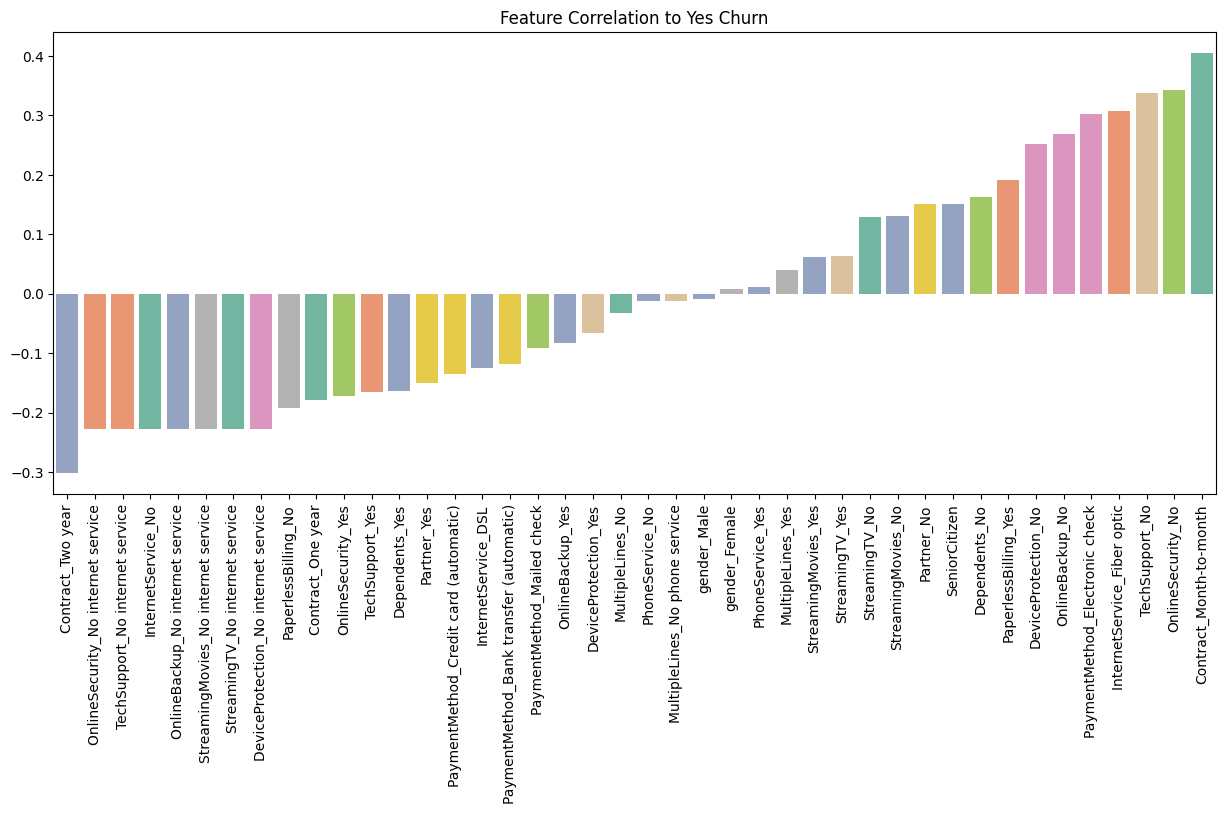

In [14]:
plt.figure(figsize=(15,6))
ax= sns.barplot(x= df_corr['Churn_Yes'].sort_values()[1:-1].index, y= df_corr['Churn_Yes'].sort_values()[1:-1].values, hue=df_corr.Churn_Yes[1:-1], legend=False, palette='Set2')

plt.xticks(rotation=90)
plt.title('Feature Correlation to Yes Churn')
ax.set_xlabel('')

plt.show()

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [15]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<Axes: xlabel='tenure', ylabel='Count'>

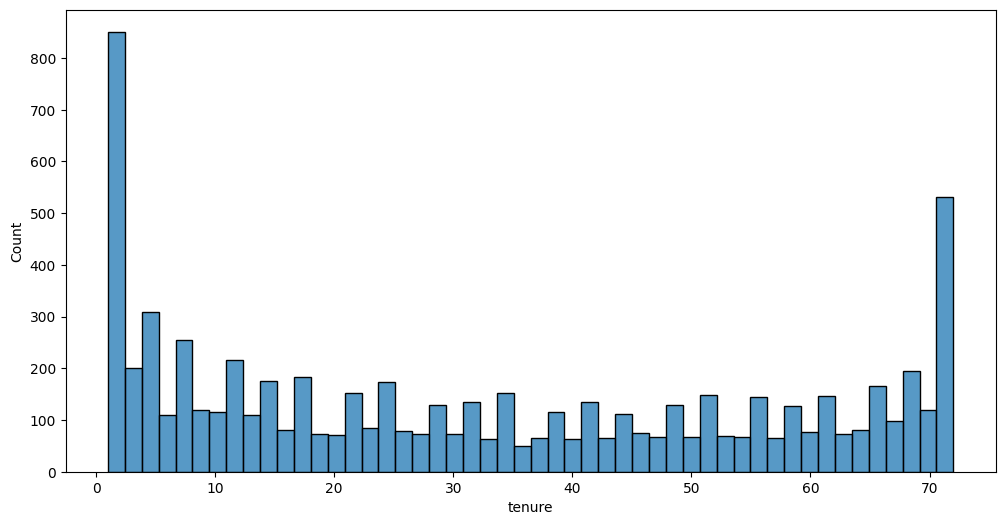

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(x= df.tenure, bins= 50)

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

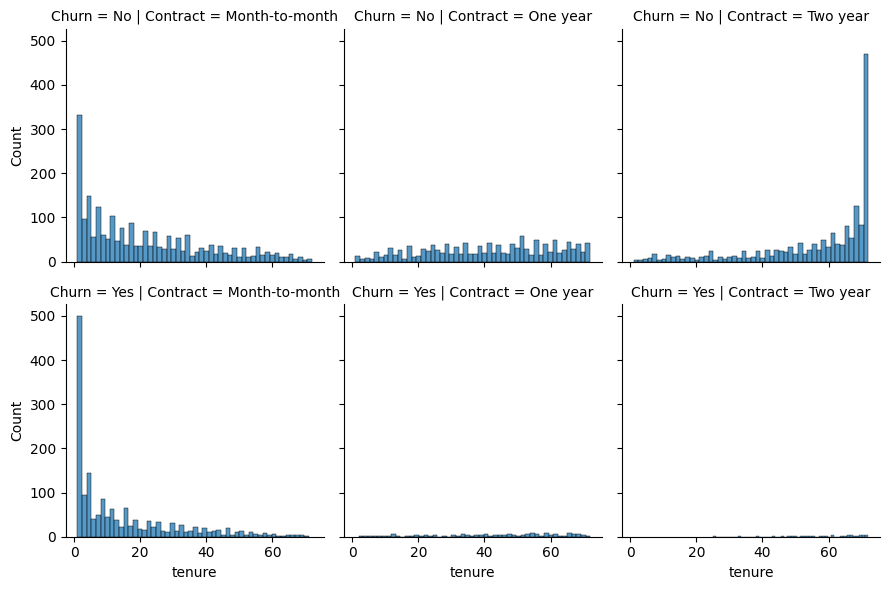

In [17]:
hist= sns.FacetGrid(data=df, row='Churn', col='Contract')
hist= hist.map(sns.histplot, 'tenure', bins=50)

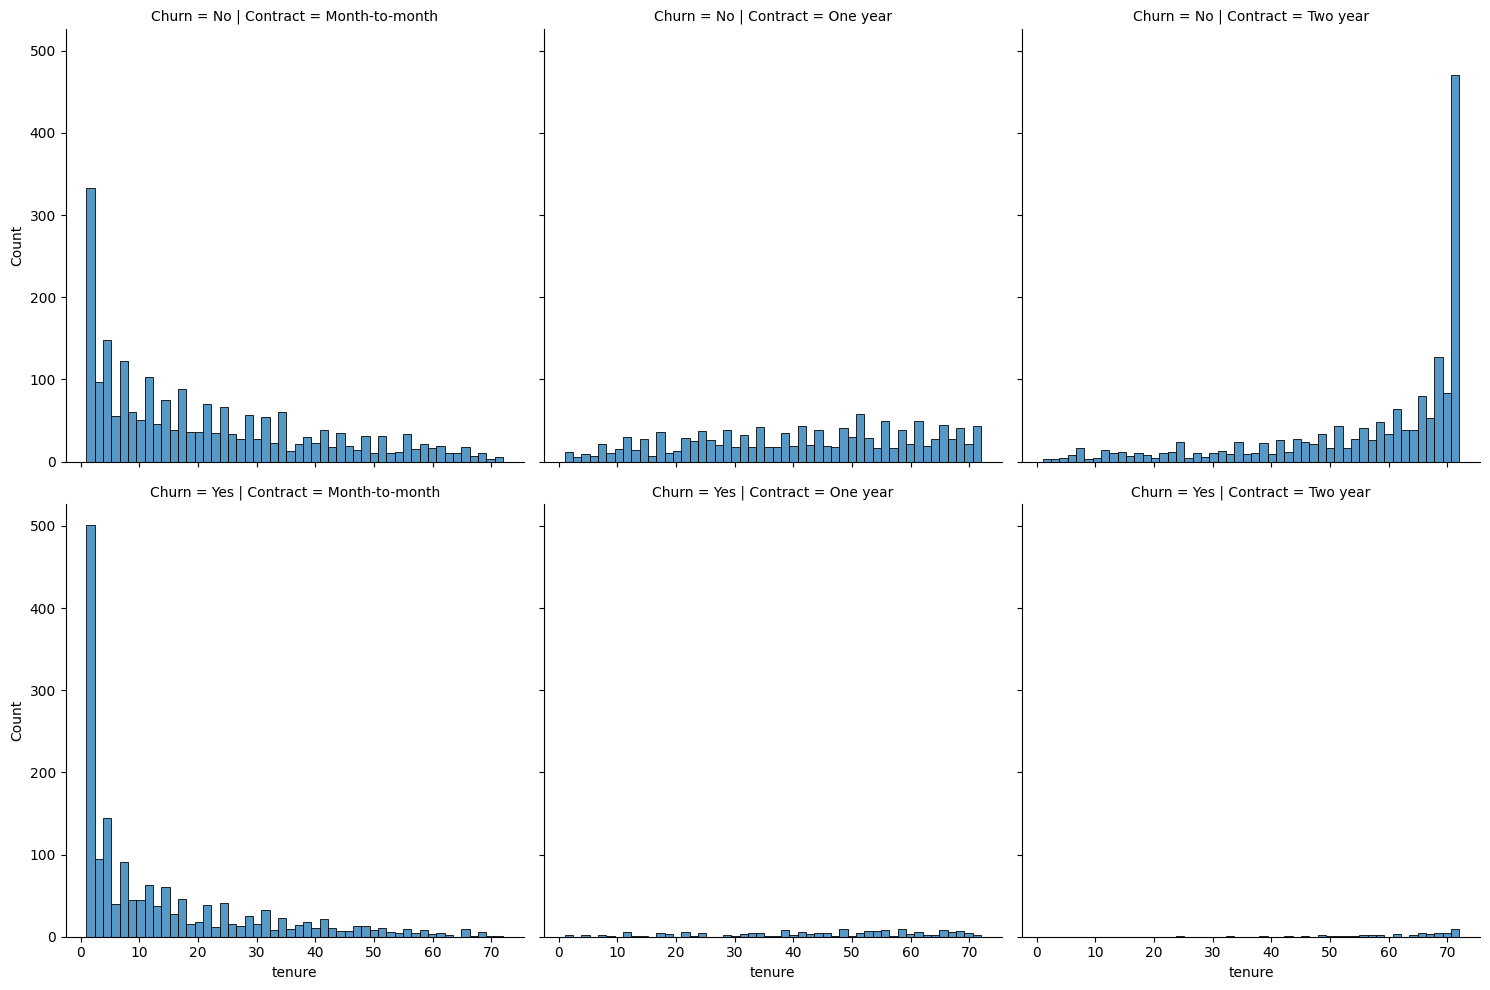

In [18]:
sns.displot(data=df, x='tenure', bins=50, row='Churn', col='Contract')

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

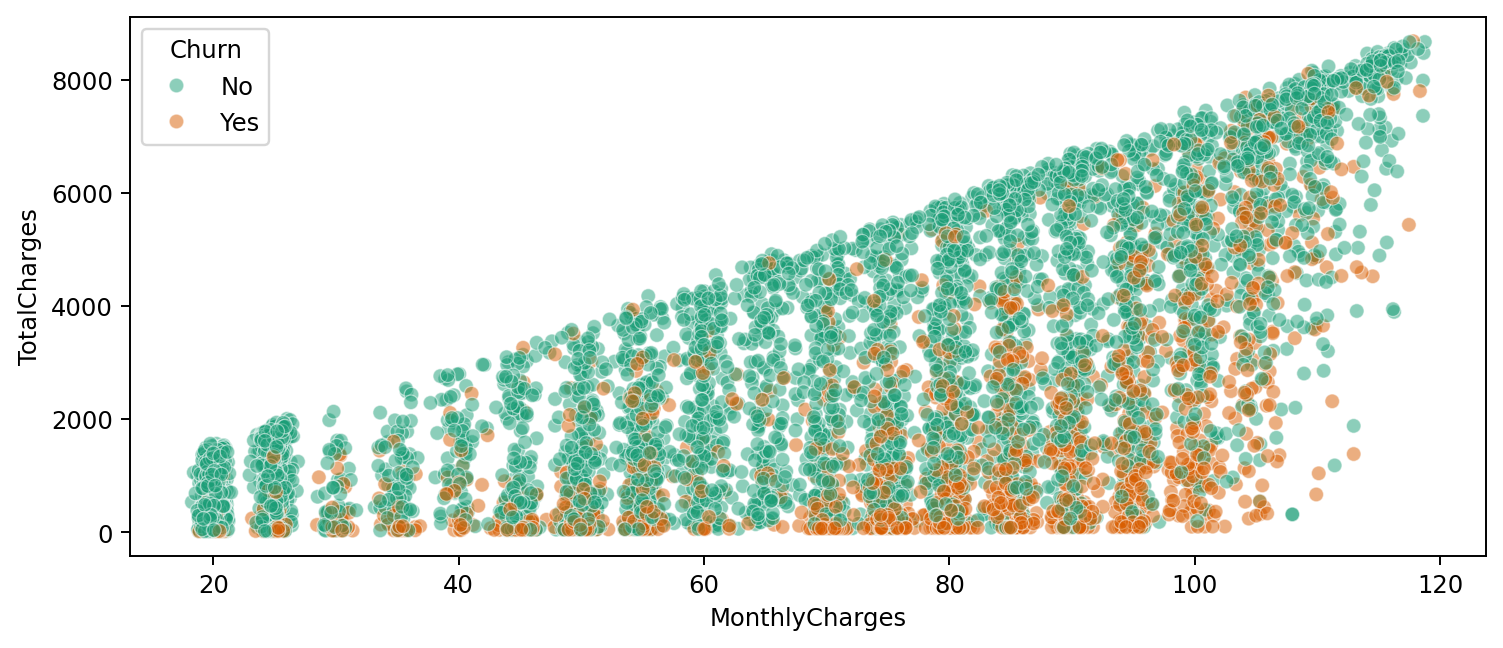

In [19]:
plt.figure(figsize=(10,4), dpi=175)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.5, lw=0.5, palette='Dark2')

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [20]:
df_cohort= df[['tenure','Churn']].copy()
df_cohort['Churn']= df_cohort['Churn'].apply(lambda x:1 if x=='Yes' else 0)
df_cohort.head()

,tenure,Churn
0,1,0
1,34,0
2,2,1
3,45,0
4,2,1


In [21]:
df_cohort= df_cohort.groupby('tenure').sum()['Churn']/ df_cohort.groupby('tenure').count()['Churn'] *100
df_cohort

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Churn, Length: 72, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

Text(0.5, 0, 'Tenure')

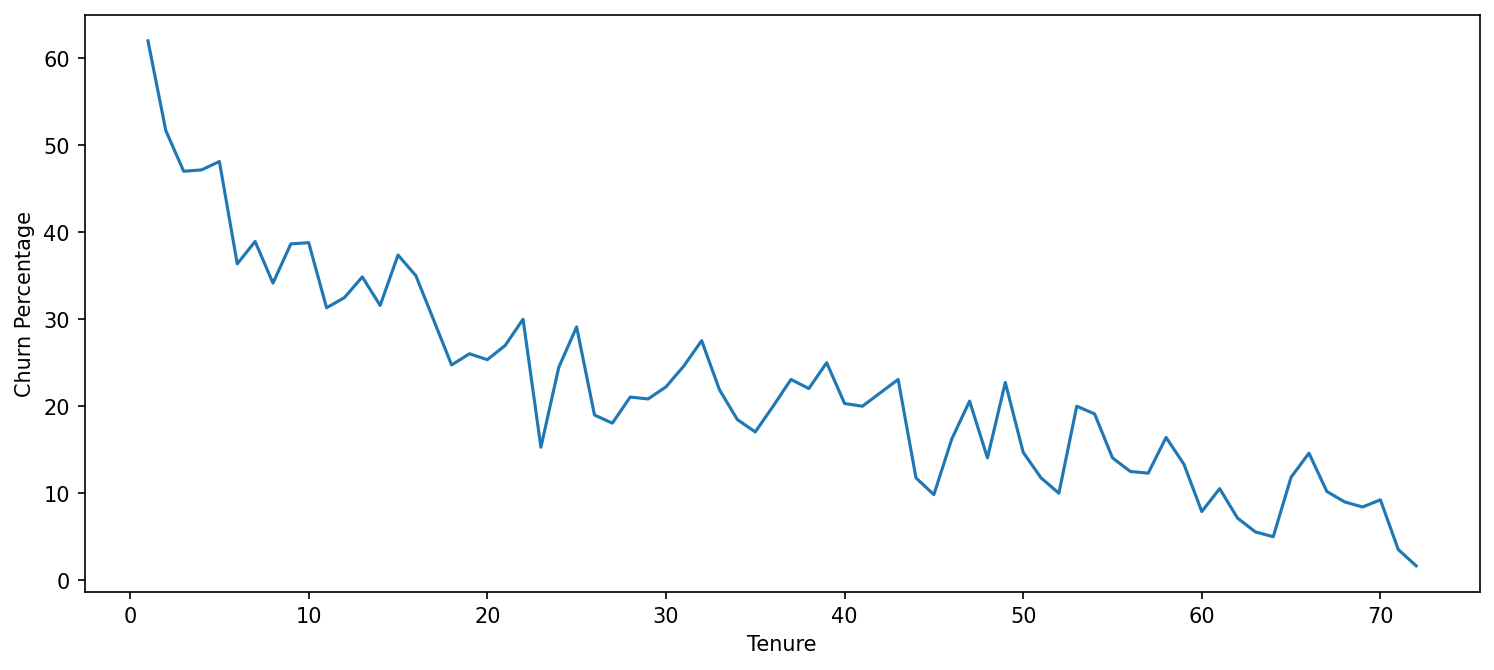

In [22]:
plt.figure(dpi=150, figsize=(12,5))
plt.plot(df_cohort)
plt.ylabel('Churn Percentage')
plt.xlabel('Tenure')

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [23]:
df_cohort_group= df[['tenure']].copy()

In [24]:
def category(length):
    if length<= 12:
        return '0-12 Months'
    elif length<= 24:
        return '12-24 Months'
    elif length<= 48:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [25]:
df_cohort_group['Tenure Cohort']= df_cohort_group['tenure'].apply(category)
df_cohort_group.head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

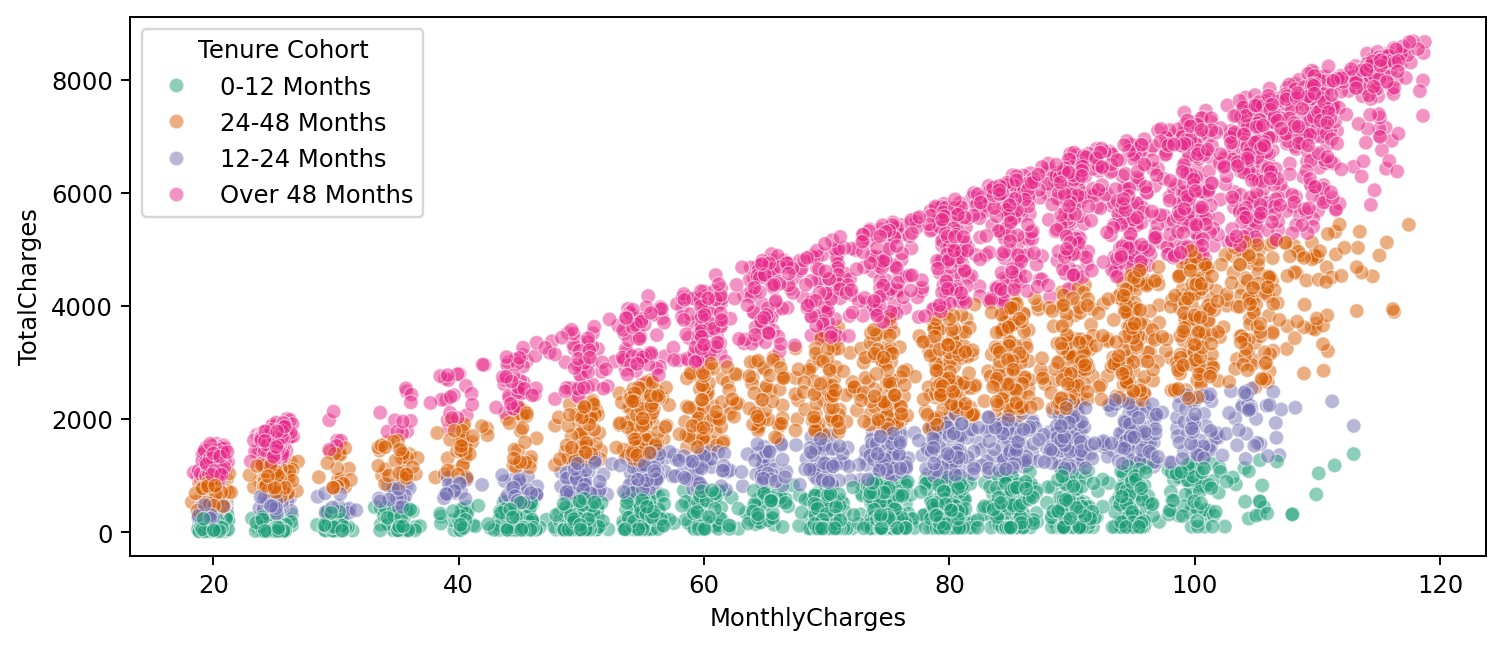

In [26]:
plt.figure(figsize=(10,4), dpi=175)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue=df_cohort_group['Tenure Cohort'], alpha=0.5, lw=0.5, palette='Dark2')

**TASK: Create a count plot showing the churn count per cohort.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

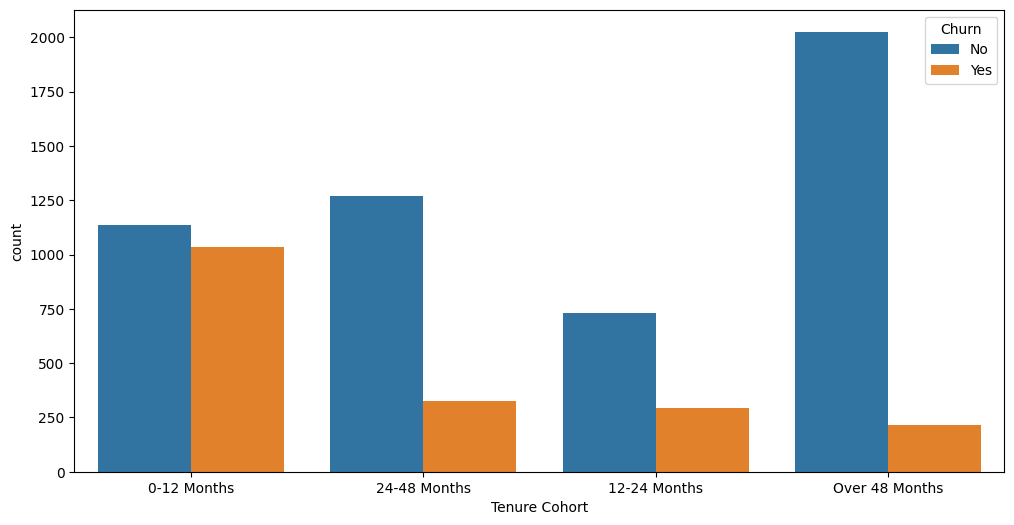

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x=df_cohort_group['Tenure Cohort'], hue= df.Churn)

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

In [28]:
df_cohort_group= pd.concat([df_cohort_group, df[['Contract', 'Churn']]], axis=1)
df_cohort_group.head()

,tenure,Tenure Cohort,Contract,Churn
0,1,0-12 Months,Month-to-month,No
1,34,24-48 Months,One year,No
2,2,0-12 Months,Month-to-month,Yes
3,45,24-48 Months,One year,No
4,2,0-12 Months,Month-to-month,Yes


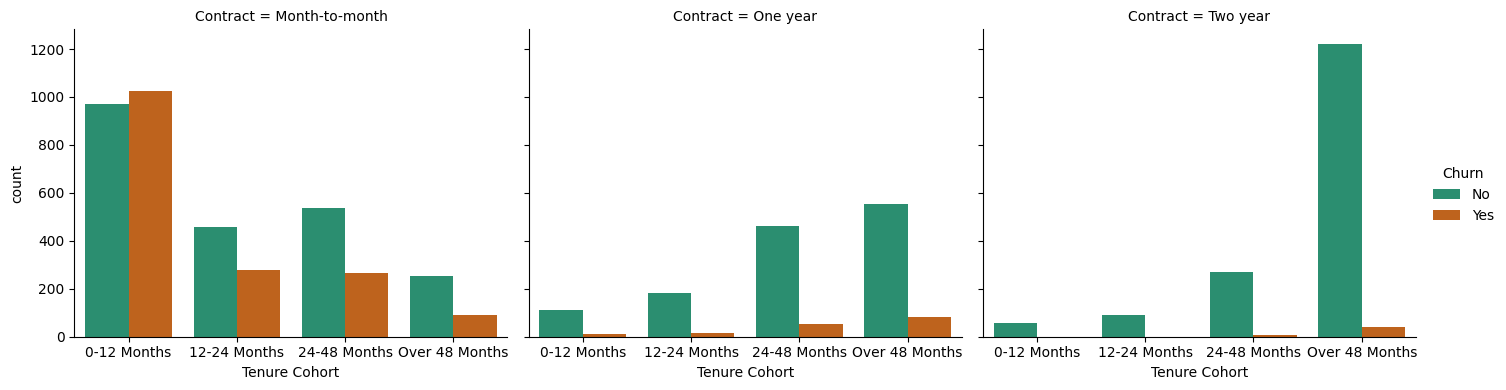

In [29]:
count= sns.FacetGrid(data= df_cohort_group, col='Contract', aspect=1.2, height=4)
count= count.map_dataframe(sns.countplot, 'Tenure Cohort', hue='Churn', palette= 'Dark2')
count.add_legend(title='Churn')

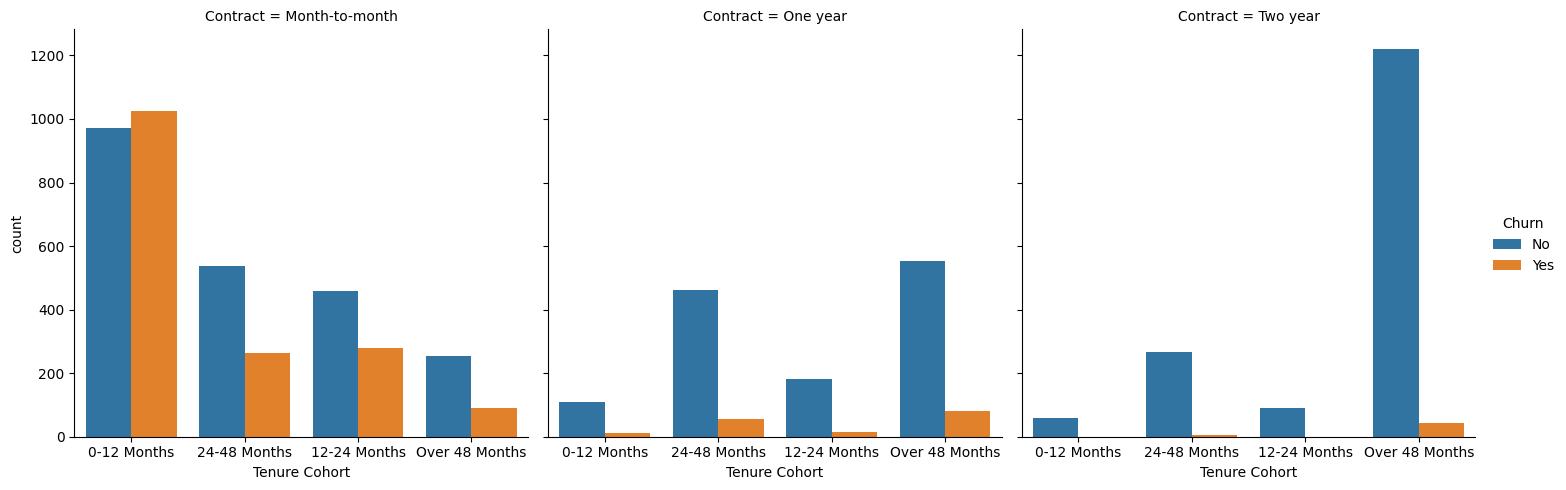

In [30]:
sns.catplot(x=df_cohort_group['Tenure Cohort'], hue=df.Churn, kind='count', col=df_cohort_group.Contract)


-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [31]:
X= df.drop(['Churn', 'customerID'], axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [32]:
X= pd.get_dummies(X, drop_first=True)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [33]:
y= df.Churn

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [36]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV

def perform_ml(model_type, search_hyper:bool=False, params:dict=None):
    model=model_type
    
    if search_hyper:
        grid= GridSearchCV(model, params)
        grid.fit(X_train, y_train)
        print(grid.best_params_)

        result_model=grid.best_estimator_
        pred= result_model.predict(X_test)
        imp= result_model.feature_importances_
    else:
        model.fit(X_train, y_train)

        pred= model.predict(X_test)
        imp= model.feature_importances_
        result_model=model

    print(classification_report(y_test, pred))

    cm= confusion_matrix(y_test, pred)
    disp= ConfusionMatrixDisplay(cm)
    disp.plot()

    df_imp= pd.DataFrame(index=X.columns, data=imp, columns= ['Feature Importance'])
    plt.figure(figsize=(12,4), dpi=125)
    sns.barplot(data= df_imp.sort_values('Feature Importance'), y='Feature Importance', x=df_imp.index, hue='Feature Importance', legend=False, palette='Dark2')
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.show()

    return result_model
    

In [38]:
from sklearn.tree import DecisionTreeClassifier

              precision    recall  f1-score   support

          No       0.86      0.78      0.82       557
         Yes       0.39      0.52      0.45       147

    accuracy                           0.73       704
   macro avg       0.63      0.65      0.63       704
weighted avg       0.76      0.73      0.74       704



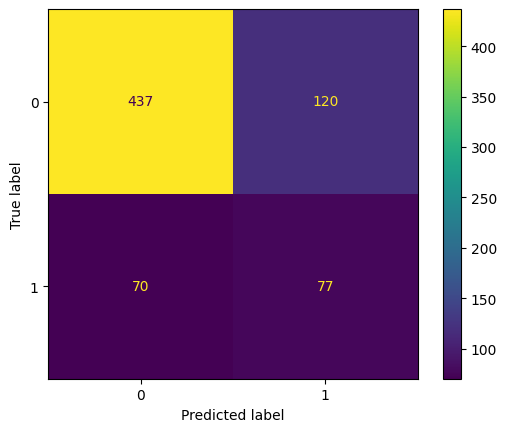

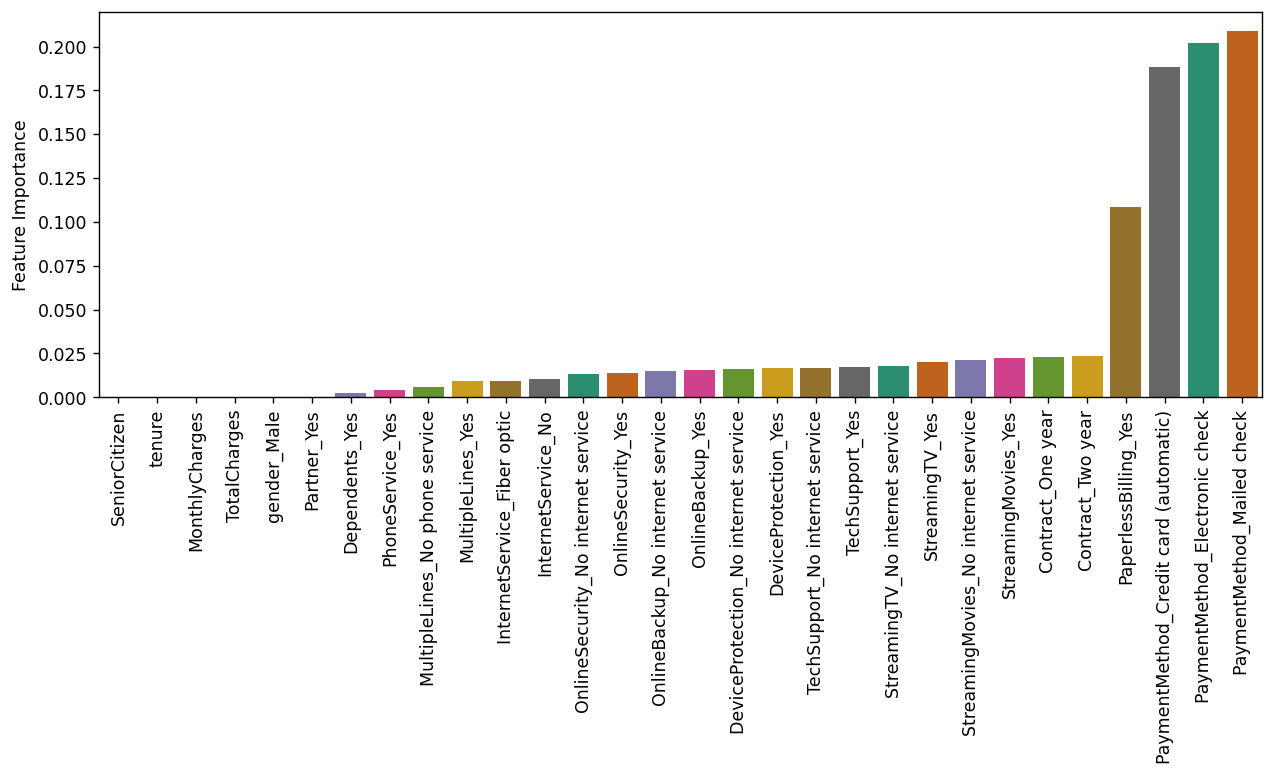

In [39]:
# Base Decision Tree
model_tree= perform_ml(DecisionTreeClassifier())

In [40]:
from sklearn.tree import plot_tree

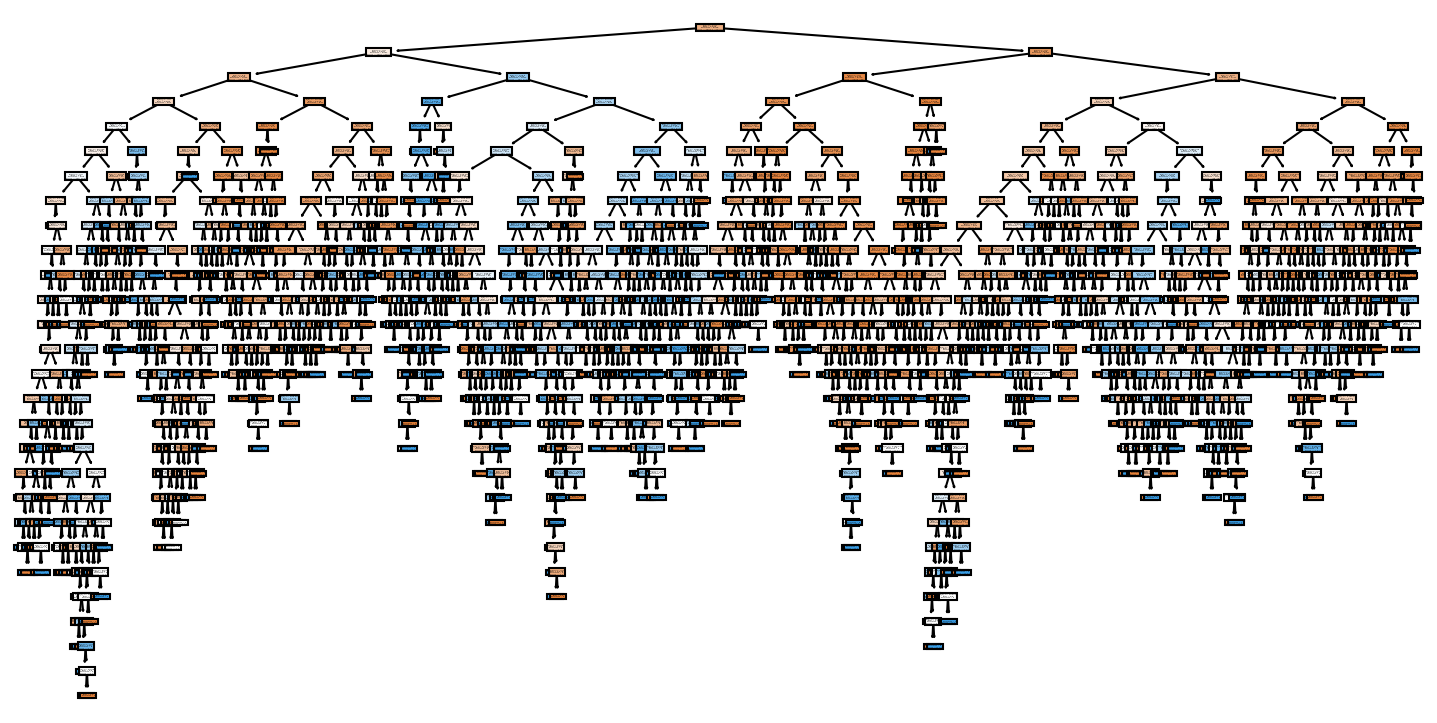

In [41]:
plt.figure(figsize=(12,6), dpi=150)
plot_tree(model_tree, filled=True)
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
465 fits failed out of a total of 14415.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
465 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "

{'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 22}
              precision    recall  f1-score   support

          No       0.85      0.91      0.88       557
         Yes       0.54      0.38      0.45       147

    accuracy                           0.80       704
   macro avg       0.69      0.65      0.66       704
weighted avg       0.78      0.80      0.79       704



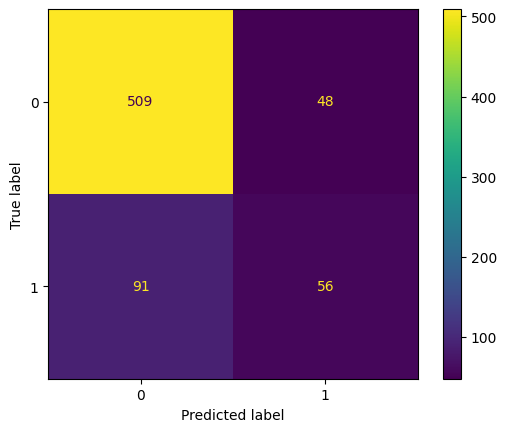

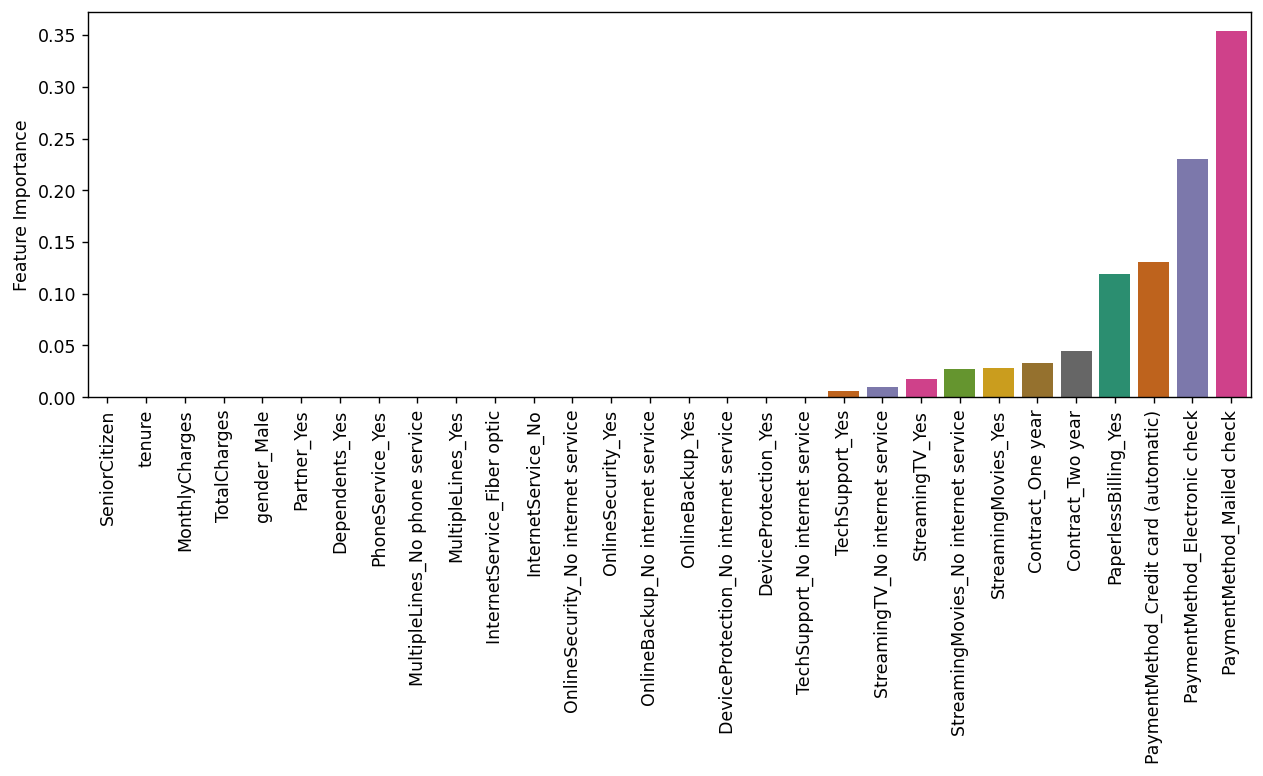

In [42]:
# Hyper Decision Tree
criterion = ["gini", "entropy", "log_loss"]
list_num= list(range(1,31))+ [None]

param_grid= {'criterion':criterion,
             'max_depth': list_num,
             'max_leaf_nodes': list_num}

model_tree_hyper= perform_ml(DecisionTreeClassifier(), search_hyper=True, params= param_grid)

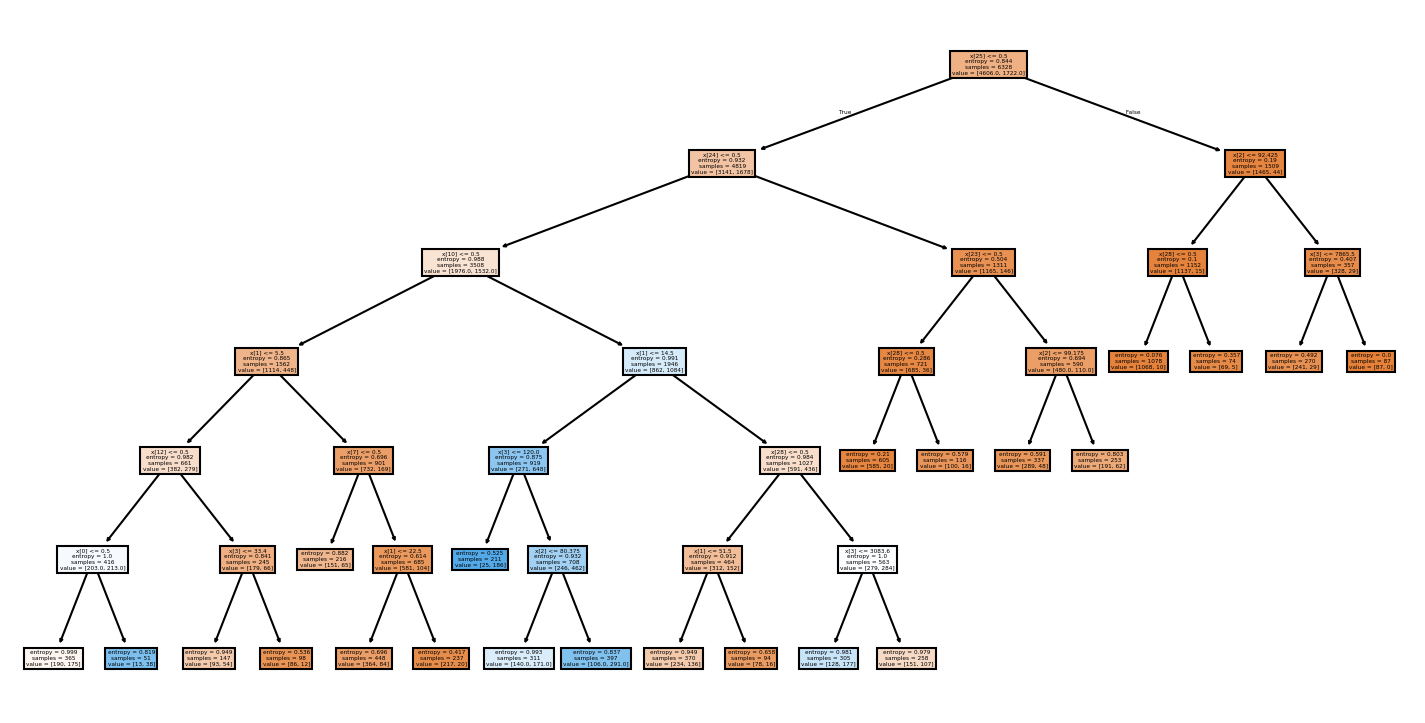

In [43]:
plt.figure(figsize=(12,6), dpi=150)
plot_tree(model_tree_hyper, filled=True)
plt.show()

<img src='hugetree.png'>

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [37]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.46      0.48       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



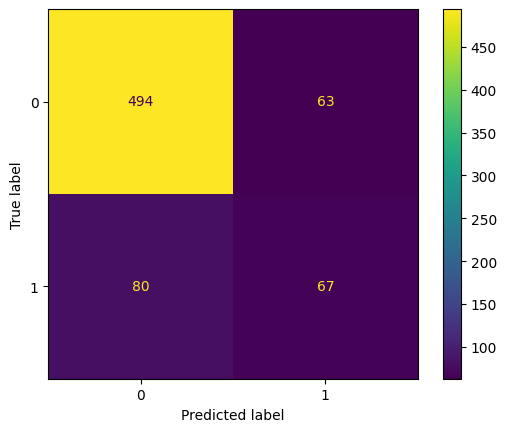

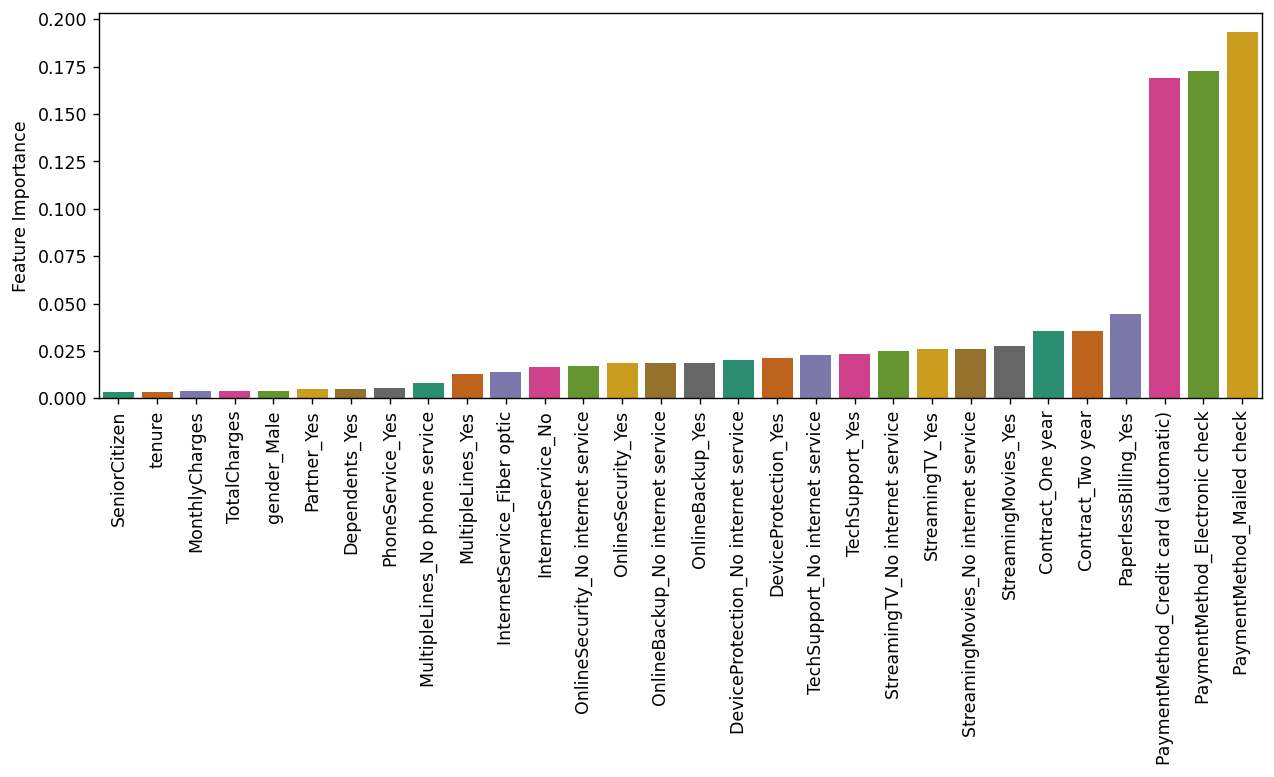

In [38]:
model_random_base= perform_ml(RandomForestClassifier())

In [46]:
len(X.columns)

30

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Admin\AppDa

{'bootstrap': True, 'criterion': 'log_loss', 'max_features': 10, 'n_estimators': 50, 'oob_score': True}
              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.48      0.49       147

    accuracy                           0.79       704
   macro avg       0.68      0.68      0.68       704
weighted avg       0.79      0.79      0.79       704



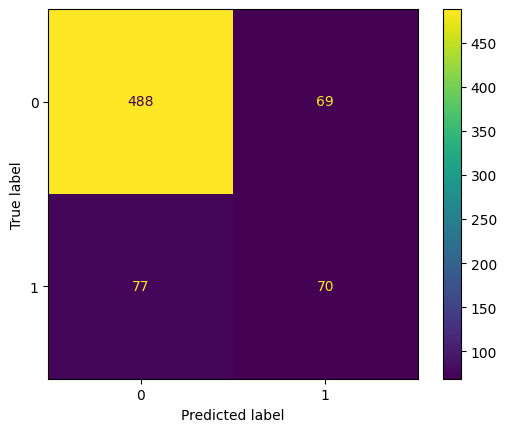

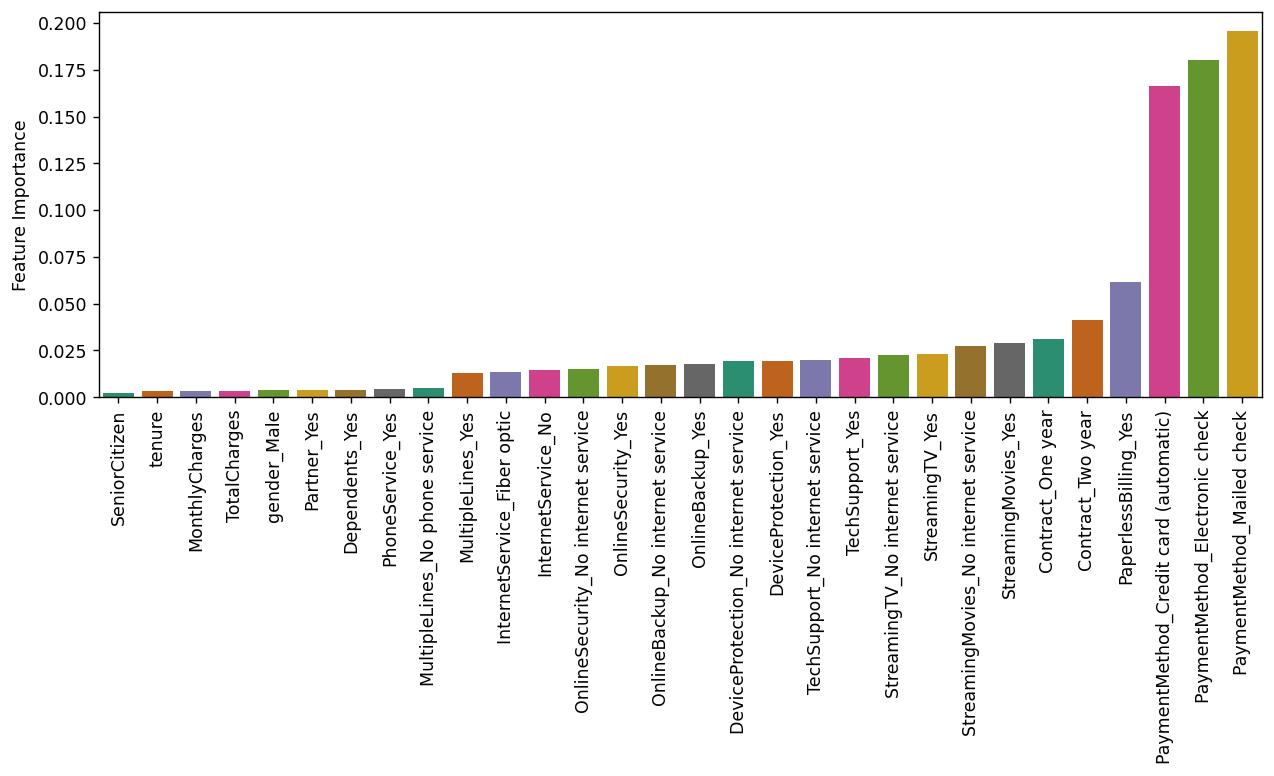

In [56]:
# list_num= list(range(1,31,10))+ [None]
list_bool= [True, False]

param_grid= {
            'criterion':["gini", "entropy", "log_loss"],
            #  'max_depth': list_num,
            #  'max_leaf_nodes': list_num,
             'n_estimators':list(range(50,151,50)),
             'max_features':list(range(10,31,15)),
             'bootstrap': list_bool,
             'oob_score': list_bool
             }

model_tree_hyper= perform_ml(RandomForestClassifier(), search_hyper=True, params= param_grid)

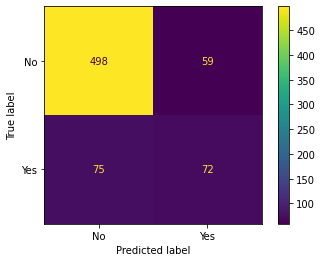

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [58]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.51      0.55       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



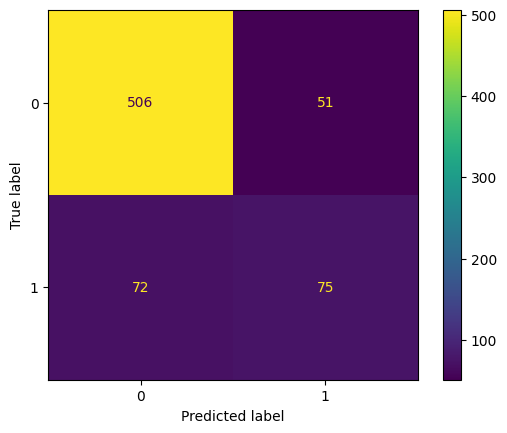

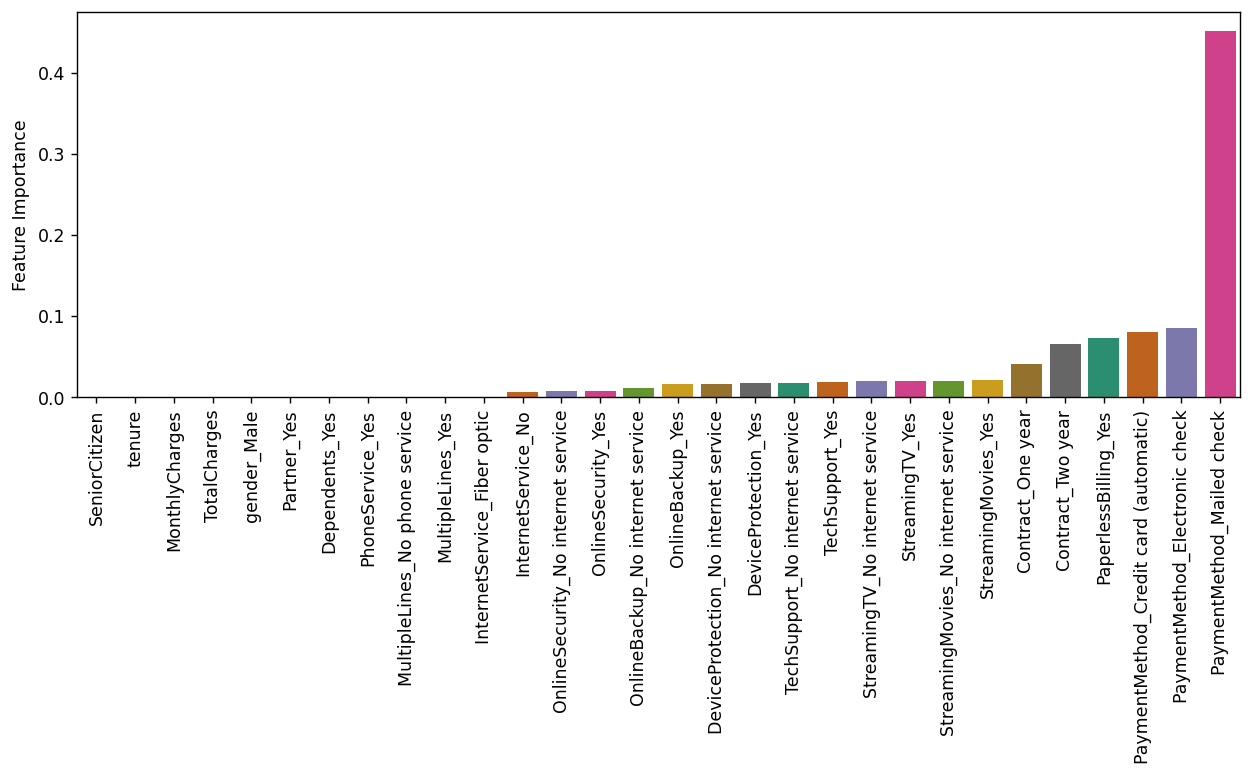

AdaBoostClassifier()

In [59]:
perform_ml(AdaBoostClassifier())

{'n_estimators': 87}
              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.62      0.50      0.56       147

    accuracy                           0.83       704
   macro avg       0.75      0.71      0.73       704
weighted avg       0.82      0.83      0.83       704



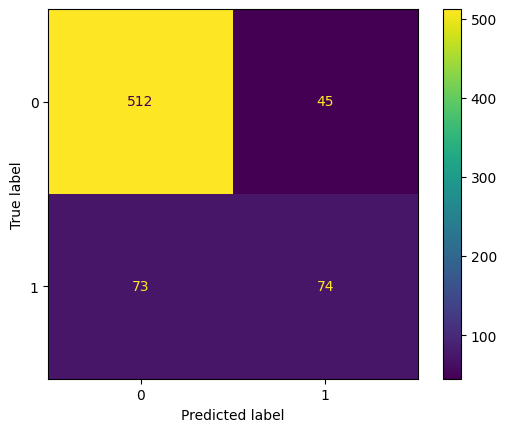

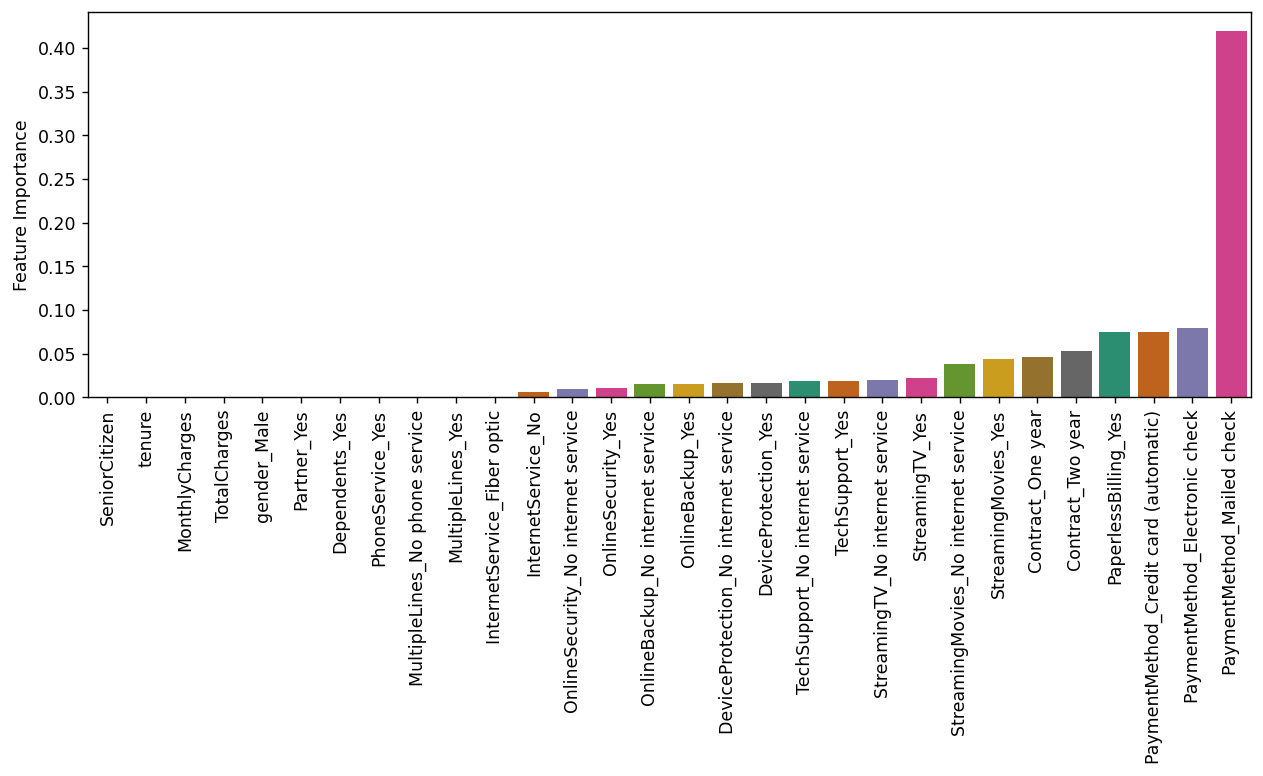

AdaBoostClassifier(n_estimators=87)

In [61]:
param_grid= {'n_estimators':list(range(50,151))}

perform_ml(AdaBoostClassifier(), search_hyper=True, params=param_grid)

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



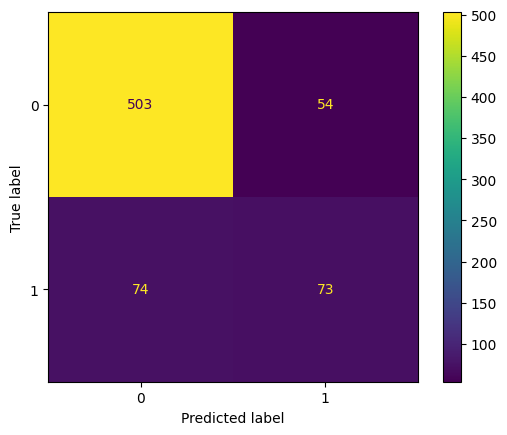

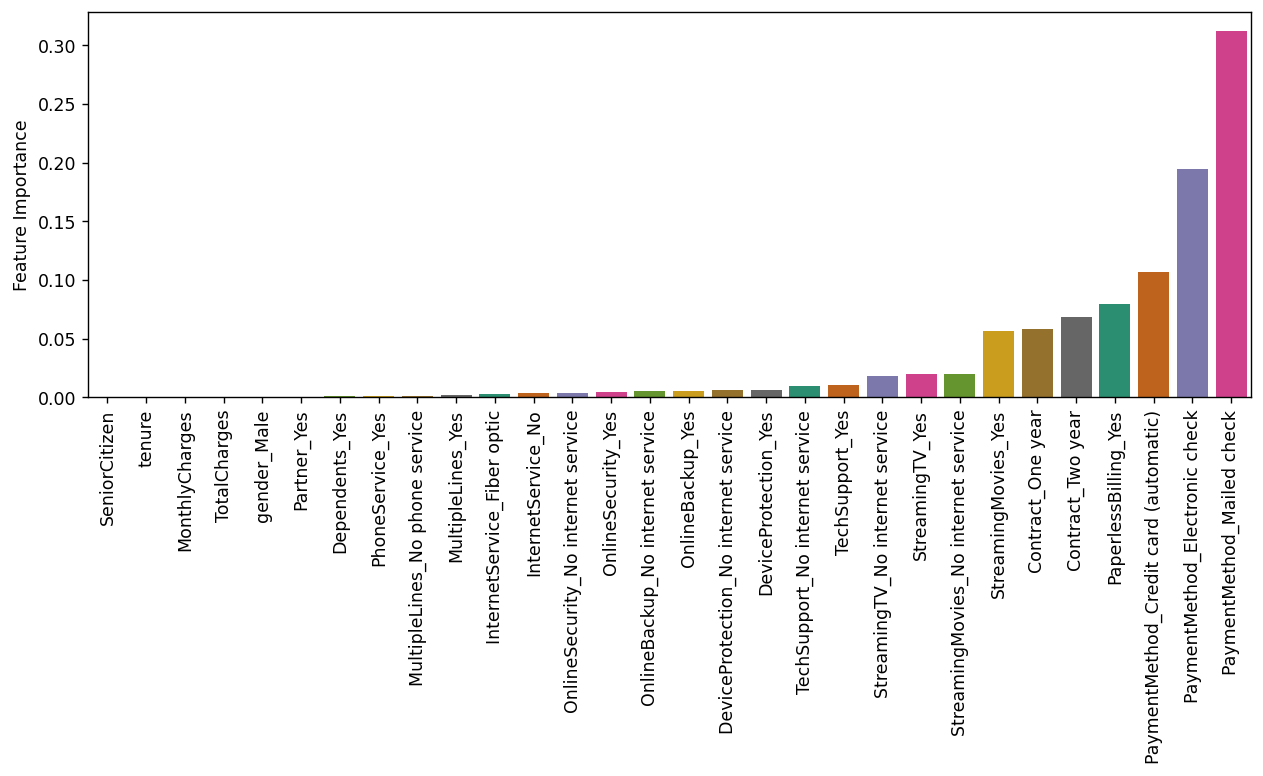

GradientBoostingClassifier()

In [62]:
perform_ml(GradientBoostingClassifier())

{'max_depth': 3, 'n_estimators': 76}
              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.51      0.55       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



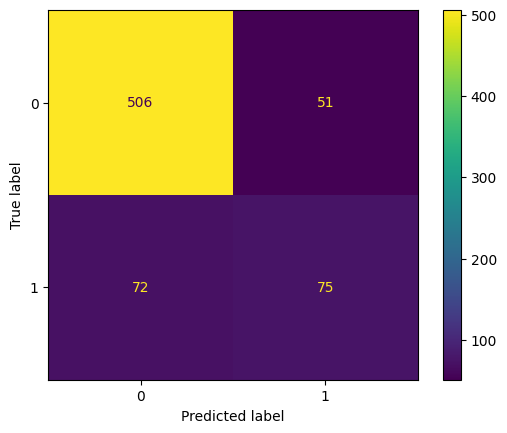

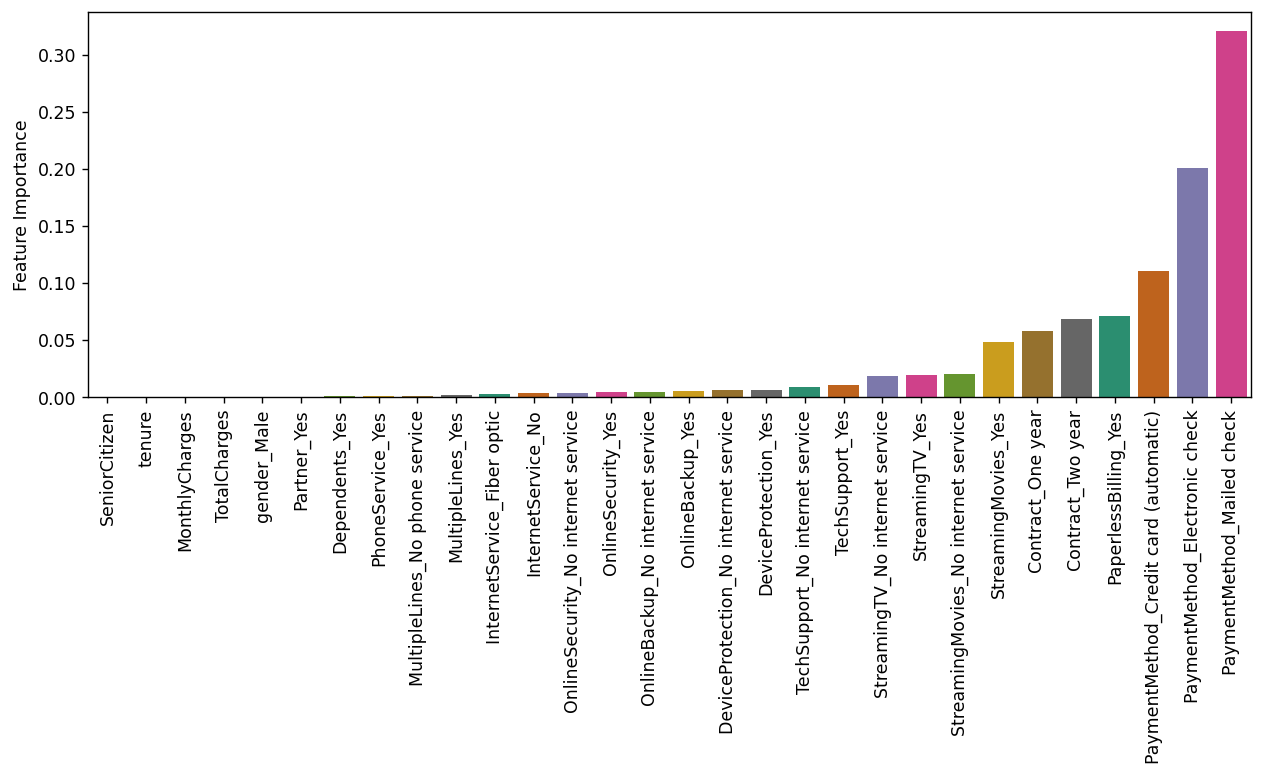

GradientBoostingClassifier(n_estimators=76)

In [71]:
param_grid= {'n_estimators':list(range(50,151,13)),
             'max_depth': list(range(1,11,2))}
perform_ml(GradientBoostingClassifier(), search_hyper=True, params=param_grid)

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



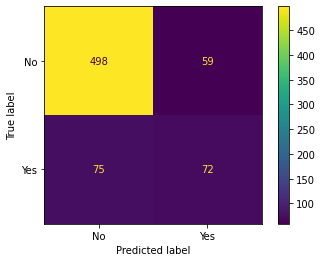

**TASK: Analyze your results, which model performed best for you?**

In [294]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

### Great job!